<a href="https://colab.research.google.com/github/sara010896/PPCA_UnB/blob/main/ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [ ]:
df = pd.read_csv("AmesHousing.csv")


In [ ]:
#Dimensões do DataFrame
print("Dimensões:", df.shape)

Dimensões: (2930, 82)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [ ]:
# Primeiras linhas do DataFrame
df.head()


Primeiras linhas:


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
#Visualizando as variaveis qualitativas
qualitativas = df.select_dtypes(include=["object", "category"])
print(qualitativas.head())

  MS Zoning Street Alley Lot Shape Land Contour Utilities Lot Config  \
0        RL   Pave  None       IR1          Lvl    AllPub     Corner   
1        RH   Pave  None       Reg          Lvl    AllPub     Inside   
2        RL   Pave  None       IR1          Lvl    AllPub     Corner   
3        RL   Pave  None       Reg          Lvl    AllPub     Corner   
4        RL   Pave  None       IR1          Lvl    AllPub     Inside   

  Land Slope Neighborhood Condition 1  ... Garage Type Garage Finish  \
0        Gtl        NAmes        Norm  ...      Attchd           Fin   
1        Gtl        NAmes       Feedr  ...      Attchd           Unf   
2        Gtl        NAmes        Norm  ...      Attchd           Unf   
3        Gtl        NAmes        Norm  ...      Attchd           Fin   
4        Gtl      Gilbert        Norm  ...      Attchd           Fin   

  Garage Qual Garage Cond Paved Drive Pool QC  Fence Misc Feature Sale Type  \
0          TA          TA           P      Ex   None   

In [ ]:
#Verificando valores faltantes
missing = df.isna().sum()
print("\nValores faltantes por coluna:")
print(missing[missing > 0])


Valores faltantes por coluna:
Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


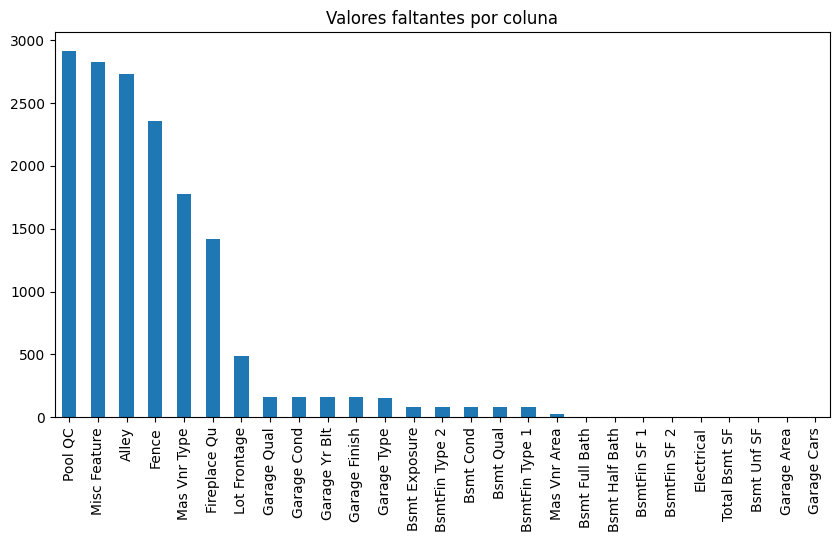

In [ ]:
plt.figure(figsize=(10,5))
missing[missing > 0].sort_values(ascending=False).plot.bar()
plt.title("Valores faltantes por coluna")
plt.show()

In [ ]:
# Tratamento de dados ausentes
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns

# variáveis numéricas (mediana)
for col in num_cols:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# variáveis categóricas
for col in cat_cols:
    if df[col].isna().sum() > 0:
        # se o NaN representa ausência, usar "None"
        if col in ["Alley", "PoolQC", "Fence", "FireplaceQu", "MiscFeature", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "MasVnrType"]:
            df[col].fillna("None", inplace=True)
        else:
            # senão, preencher com a moda
            df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-852410265.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-852410265.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
#Validação do tratamento de dados ausentes
missing = df.isna().sum()
print("\nValores faltantes por coluna:")
print(missing[missing > 0])


Valores faltantes por coluna:
Series([], dtype: int64)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            2930 non-null   object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

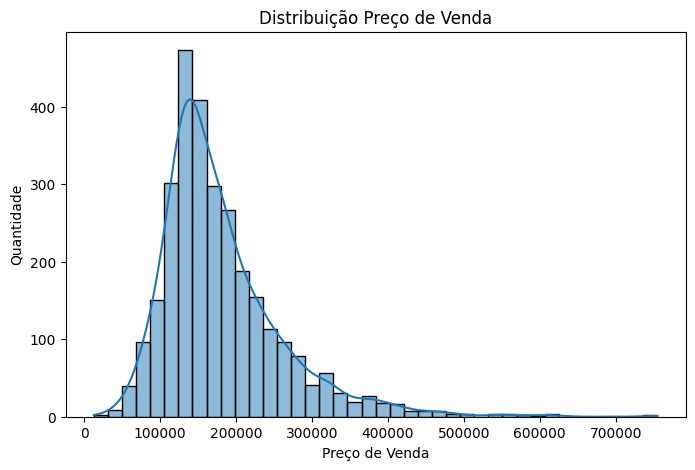

In [ ]:
# Distribuição Preço de Venda
plt.figure(figsize=(8,5))
sns.histplot(df["SalePrice"], bins=40, kde=True)
plt.title("Distribuição Preço de Venda")
plt.xlabel("Preço de Venda")
plt.ylabel("Quantidade")
plt.show()

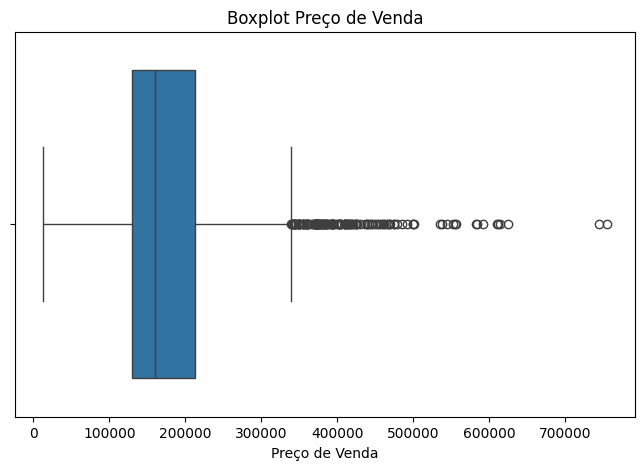

In [ ]:
# Boxplot Preço de Venda
plt.figure(figsize=(8,5))
sns.boxplot(x=df["SalePrice"])
plt.title("Boxplot Preço de Venda")
plt.xlabel("Preço de Venda")
plt.show()

In [ ]:
def analisar_categoria(df, var, target="SalePrice"):
    print(f"\n>>> Análise de {var}\n")

    data = df[[var, target]].dropna()

    # Modelo ANOVA
    modelo = ols(f"{target} ~ C({var})", data=data).fit()
    anova_table = sm.stats.anova_lm(modelo, typ=2)
    print("Tabela ANOVA:\n", anova_table, "\n")

    # Médias por categoria
    medias = data.groupby(var)[target].mean().sort_values(ascending=False)
    print("Média de SalePrice por categoria (top 10):")
    print(medias.head(10), "\n")

    # Testes de pressupostos
    residuos = modelo.resid

    # Normalidade (Shapiro com amostra até 500 pontos)
    shapiro_test = stats.shapiro(residuos.sample(500, random_state=42)) if len(residuos) > 500 else stats.shapiro(residuos)
    print("Shapiro-Wilk (normalidade, até 500 amostras):", shapiro_test)
    sm.qqplot(residuos, line='s')
    plt.title(f"QQ-Plot resíduos ({var})")
    plt.xlabel("Quantis Teóricos")
    plt.ylabel("Quantis da Amostra")
    plt.show()

    # Homocedasticidade
    grupos = [data.loc[data[var]==g, target] for g in data[var].unique()]
    levene_test = stats.levene(*grupos)
    print("Levene (homocedasticidade):", levene_test)

    # Independência dos erros
    dw = sm.stats.stattools.durbin_watson(residuos)
    print("Durbin-Watson (independência):", dw, "\n")

    # Quando os pressupostos não são atendidos, utiliza-se o teste de Kruskal-Wallis
    if shapiro_test.pvalue < 0.05 or levene_test.pvalue < 0.05:
        print("Pressupostos violados: aplicação do teste de Kruskal-Wallis\n")
        kruskal = stats.kruskal(*grupos)
        print("Resultado Kruskal-Wallis:", kruskal, "\n")
    else:
        print("Pressupostos atendidos: ANOVA tradicional é adequada\n")

    # Boxplot (ordenado pelas médias)
    plt.figure(figsize=(12,6))
    sns.boxplot(x=var, y=target, data=data, order=medias.index)
    plt.xticks(rotation=45)
    plt.title(f"Distribuição de Preço de Venda por {var}")
    plt.xlabel(var)
    plt.ylabel("Preço de Venda")
    plt.show()


>>> Análise de Heating

Tabela ANOVA:
                   sum_sq      df         F    PR(>F)
C(Heating)  1.817259e+11     5.0  5.741147  0.000028
Residual    1.851081e+13  2924.0       NaN       NaN 

Média de SalePrice por categoria (top 10):
Heating
GasA     181594.075563
GasW     159009.185185
OthW     125750.000000
Grav      83711.111111
Wall      77150.000000
Floor     72500.000000
Name: SalePrice, dtype: float64 

Shapiro-Wilk (normalidade, até 500 amostras): ShapiroResult(statistic=np.float64(0.8845062700052402), pvalue=np.float64(6.999020965466736e-19))


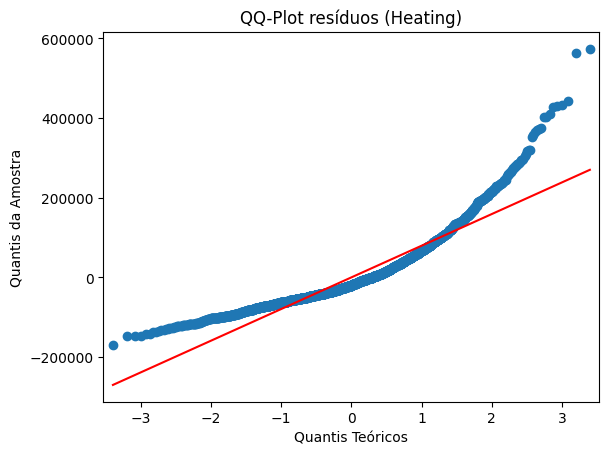

Levene (homocedasticidade): LeveneResult(statistic=np.float64(1.5630532512077244), pvalue=np.float64(0.16709011606143273))
Durbin-Watson (independência): 0.7284571675174792 

Pressupostos violados → usando Kruskal-Wallis

Resultado Kruskal-Wallis: KruskalResult(statistic=np.float64(41.37554207849194), pvalue=np.float64(7.878481858701178e-08)) 



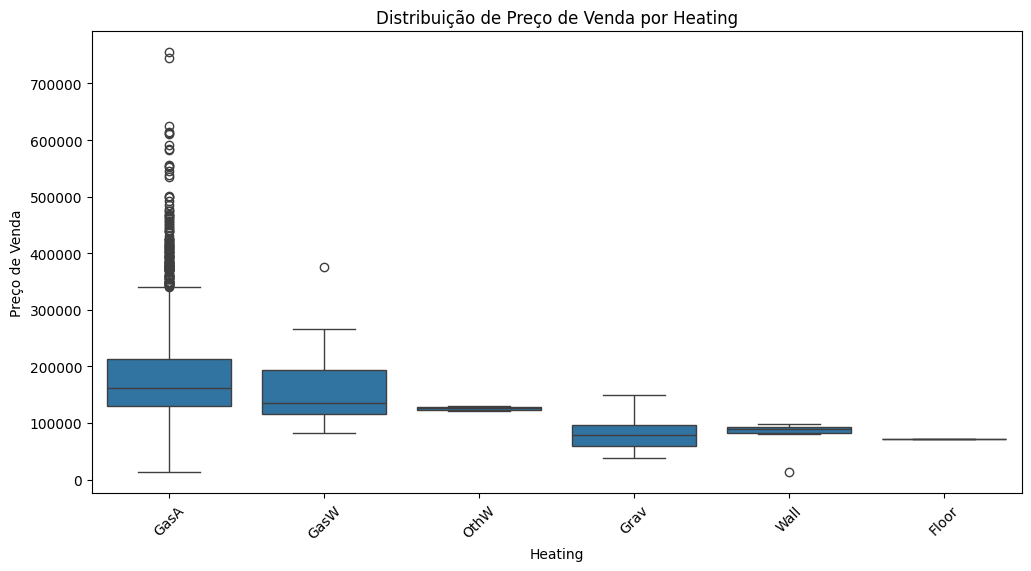

In [ ]:
analisar_categoria(df, "Heating")


>>> Análise de Neighborhood

Tabela ANOVA:
                        sum_sq      df           F  PR(>F)
C(Neighborhood)  1.071600e+13    27.0  144.395077     0.0
Residual         7.976533e+12  2902.0         NaN     NaN 

Média de SalePrice por categoria (top 10):
Neighborhood
NoRidge    330319.126761
StoneBr    324229.196078
NridgHt    322018.265060
GrnHill    280000.000000
Veenker    248314.583333
Timber     246599.541667
Somerst    229707.324176
ClearCr    208662.090909
Crawfor    207550.834951
CollgCr    201803.434457
Name: SalePrice, dtype: float64 

Shapiro-Wilk (normalidade, até 500 amostras): ShapiroResult(statistic=np.float64(0.895932066191684), pvalue=np.float64(6.315375979130202e-18))


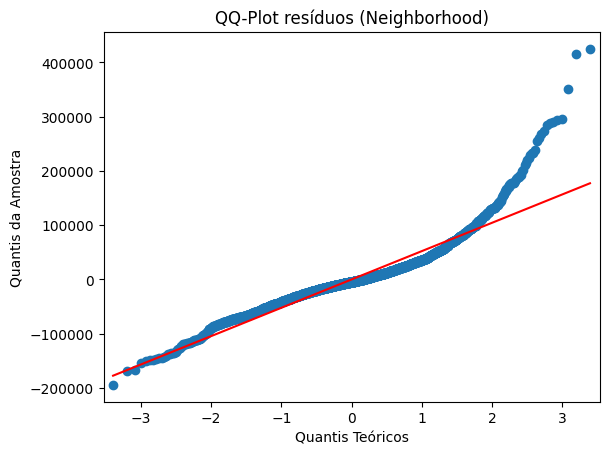

Levene (homocedasticidade): LeveneResult(statistic=np.float64(25.224949004990727), pvalue=np.float64(2.9152025799049525e-112))
Durbin-Watson (independência): 1.4454914914968147 

Pressupostos violados → usando Kruskal-Wallis

Resultado Kruskal-Wallis: KruskalResult(statistic=np.float64(1798.767020286246), pvalue=np.float64(0.0)) 



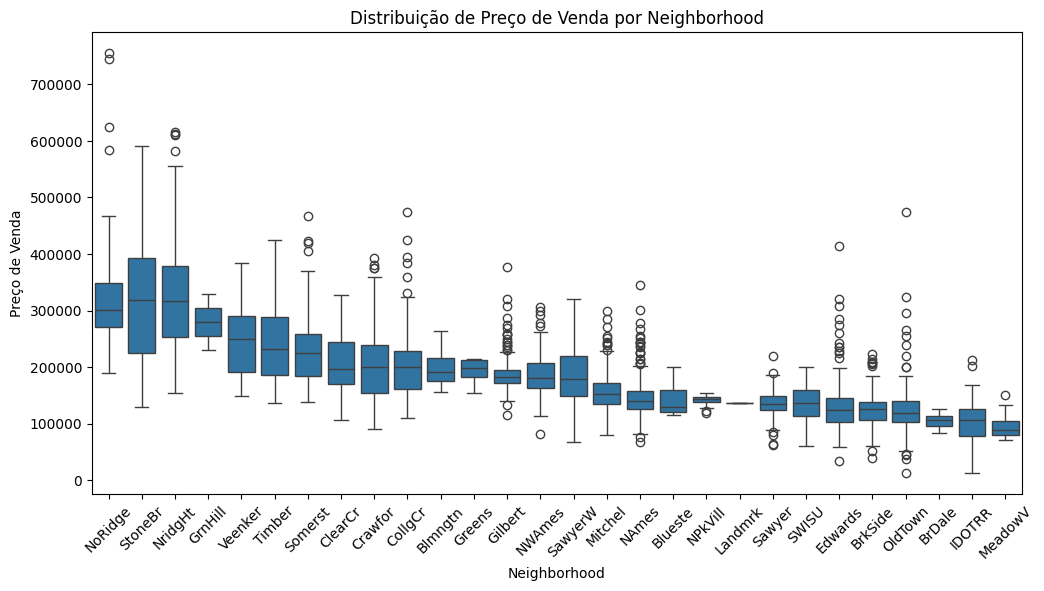

In [ ]:
analisar_categoria(df, "Neighborhood")


>>> Análise de Street

Tabela ANOVA:
                  sum_sq      df          F    PR(>F)
C(Street)  6.621914e+10     1.0  10.409445  0.001268
Residual   1.862632e+13  2928.0        NaN       NaN 

Média de SalePrice por categoria (top 10):
Street
Pave    181100.923920
Grvl    106663.333333
Name: SalePrice, dtype: float64 

Shapiro-Wilk (normalidade, até 500 amostras): ShapiroResult(statistic=np.float64(0.8851120656455292), pvalue=np.float64(7.832724567683279e-19))


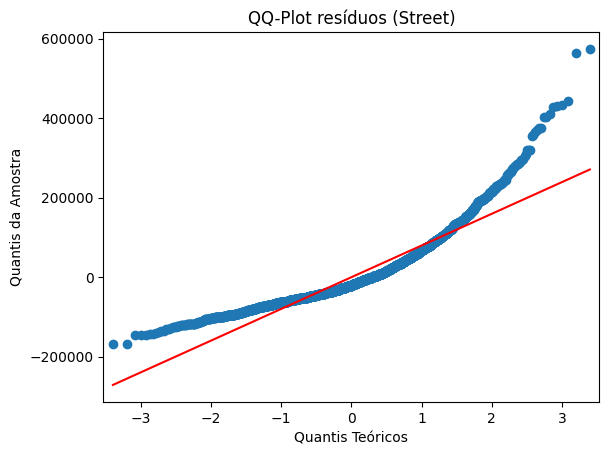

Levene (homocedasticidade): LeveneResult(statistic=np.float64(0.6367873623584153), pvalue=np.float64(0.4249412525449162))
Durbin-Watson (independência): 0.7138983978630578 

Pressupostos violados → usando Kruskal-Wallis

Resultado Kruskal-Wallis: KruskalResult(statistic=np.float64(13.47063753858629), pvalue=np.float64(0.00024232595564728192)) 



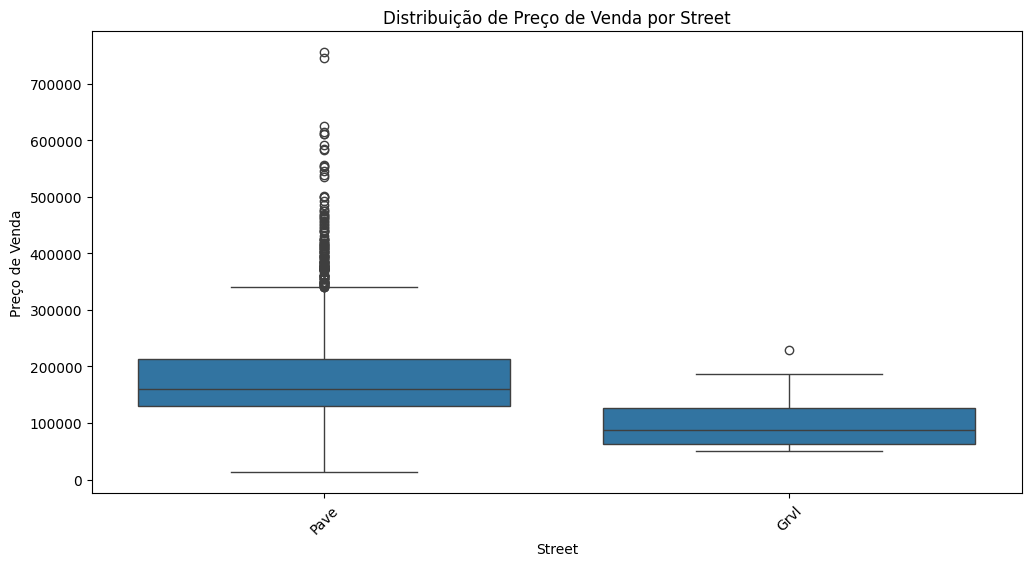

In [ ]:
analisar_categoria(df, "Street")